In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 5.2 MB/s 


**SHAP**: 
https://github.com/slundberg/shap

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('drive/MyDrive/Machine Learning: Final Project/Pima_dataset/diabetes.csv')

In [ ]:
X = data.drop(["Outcome"], axis=1)
y = data["Outcome"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(random_state=42)

In [ ]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "n_estimators": range(0, 81, 2)
}
search = GridSearchCV(adb, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Best parameter (CV score=0.765):
{'n_estimators': 10}
Test accuracy:0.768



5 fits failed out of a total of 205.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_weight_boosting.py", line 486, in fit
    return super().fit(X, y, sample_weight)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_weight_boosting.py", line 132, in fit
    self._validate_estimator()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_weight_boosting.py", line 490, in _validate_estimator
    super()._validat

              precision    recall  f1-score   support

  No Diabete       0.82      0.83      0.83       168
     Diabete       0.66      0.64      0.65        86

    accuracy                           0.77       254
   macro avg       0.74      0.74      0.74       254
weighted avg       0.77      0.77      0.77       254



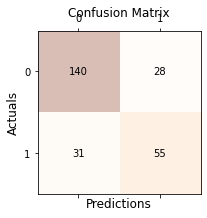

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

y_pred = search.best_estimator_.predict(X_test)
y_pred_proba = search.best_estimator_.predict_proba(X_test)[:, 1]
# roc_auc_score(y_test, y_pred)

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.811392580287929


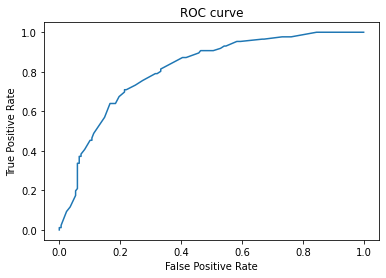

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(random_state=42, n_estimators=10)
adb.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=10, random_state=42)

              precision    recall  f1-score   support

  No Diabete       0.82      0.83      0.83       168
     Diabete       0.66      0.64      0.65        86

    accuracy                           0.77       254
   macro avg       0.74      0.74      0.74       254
weighted avg       0.77      0.77      0.77       254



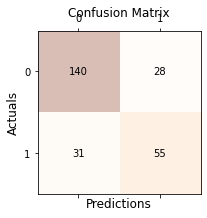

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

y_pred = adb.predict(X_test)
y_pred_proba = adb.predict_proba(X_test)[:, 1]
# roc_auc_score(y_test, y_pred)

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

https://slundberg.github.io/shap/notebooks/Census%20income%20classification%20with%20scikit-learn.html

In [ ]:
f = lambda x: adb.predict_proba(x)[:,1]
med = X_train.median().values.reshape((1,X_train.shape[1]))

In [ ]:
import shap
# print the JS visualization code to the notebook
shap.initjs()
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.KernelExplainer(f, med)
shap_values_single = explainer.shap_values(X_test)


X does not have valid feature names, but AdaBoostClassifier was fitted with feature names


  0%|          | 0/254 [00:00<?, ?it/s]

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
X does not

In [ ]:
shap.initjs()

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values_single[0], X_test.iloc[0])

In [ ]:
print(X_test.iloc[0])
print(y_test.iloc[0])

Pregnancies                   6.00
Glucose                      98.00
BloodPressure                58.00
SkinThickness                33.00
Insulin                     190.00
BMI                          34.00
DiabetesPedigreeFunction      0.43
Age                          43.00
Name: 668, dtype: float64
0


The above explanation shows four features each contributing to push the model output from the base value (the average model output over the training dataset we passed) towards zero. If there were any features pushing the class label higher they would be shown in red.

If we take many explanations such as the one shown above, rotate them 90 degrees, and then stack them horizontally, we can see explanations for an entire dataset. This is exactly what we do below for all the examples in the iris test set:

In [ ]:
shap.initjs()

shap_values = explainer.shap_values(X_test, nsamples=254)
shap.force_plot(explainer.expected_value, shap_values, X_test)


  0%|          | 0/254 [00:00<?, ?it/s]

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
X does not

A summary plot is an even better way to see the relative impact of all features over the entire dataset. Features are sorted by the sum of their SHAP value magnitudes across all samples.

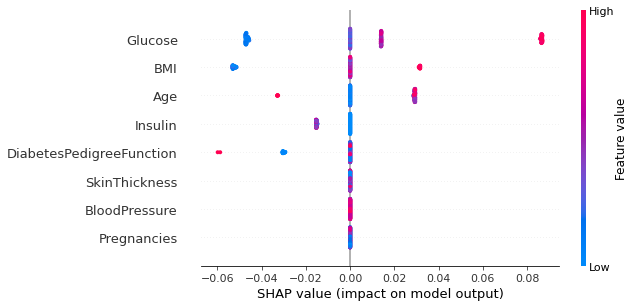

In [ ]:
shap.summary_plot(shap_values, X_test)

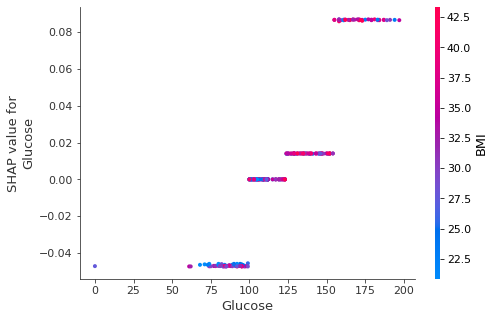

In [ ]:
shap.dependence_plot("Glucose", shap_values, X_test)

A dependence plot shows how the level of glucose increases the chance of being diagnosed with diabetes.

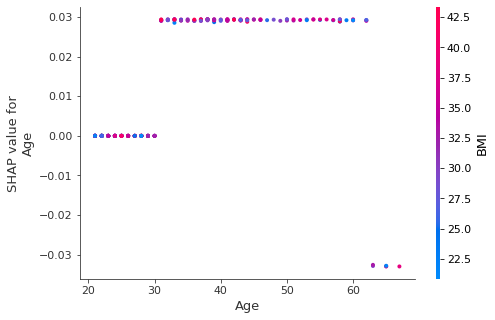

In [ ]:
shap.dependence_plot("Age", shap_values, X_test)

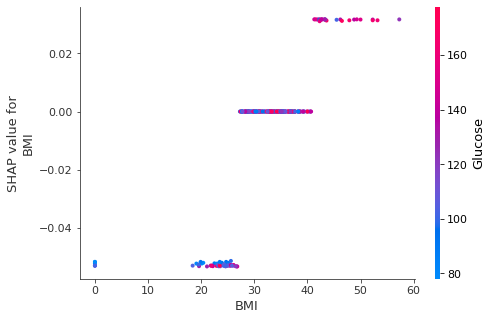

In [ ]:
shap.dependence_plot("BMI", shap_values, X_test)

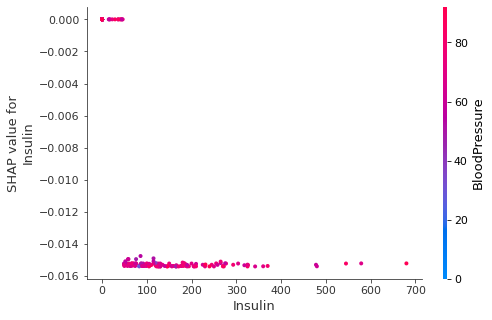

In [ ]:
shap.dependence_plot("Insulin", shap_values, X_test)

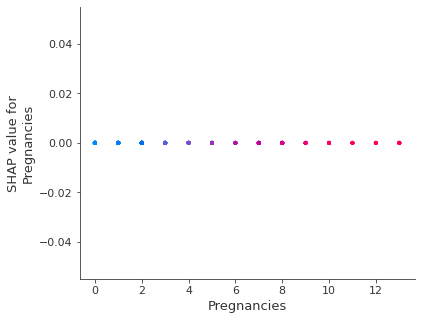

In [ ]:
shap.dependence_plot("Pregnancies", shap_values, X_test)

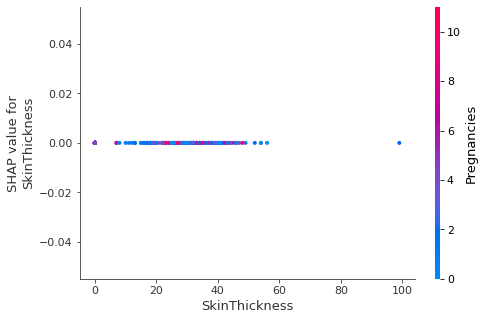

In [ ]:
shap.dependence_plot("SkinThickness", shap_values, X_test)

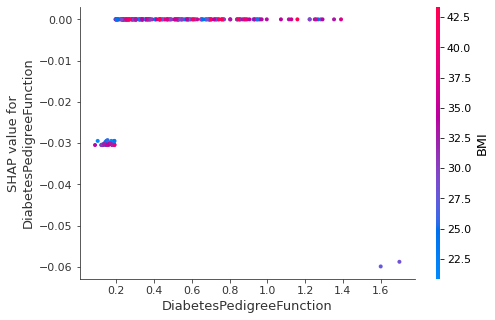

In [ ]:
shap.dependence_plot("DiabetesPedigreeFunction", shap_values, X_test)

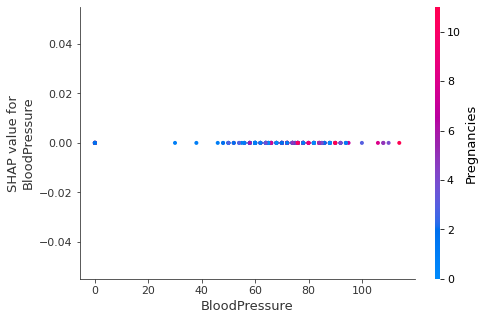

In [ ]:
shap.dependence_plot("BloodPressure", shap_values, X_test)

### XGBoost

https://slundberg.github.io/shap/notebooks/deep_explainer/Front%20Page%20DeepExplainer%20MNIST%20Example.html

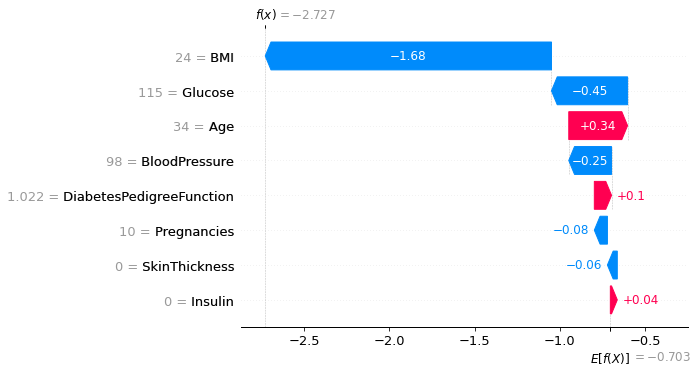

In [ ]:
import xgboost
import shap

# train an XGBoost model
# model = xgboost.XGBClassifier.fit(X_train,y_train)
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [ ]:
print(X_train.iloc[0])
print(y_train.iloc[0])

Pregnancies                  10.000
Glucose                     115.000
BloodPressure                98.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          24.000
DiabetesPedigreeFunction      1.022
Age                          34.000
Name: 464, dtype: float64
0


              precision    recall  f1-score   support

  No Diabete       0.81      0.79      0.80       168
     Diabete       0.61      0.65      0.63        86

    accuracy                           0.74       254
   macro avg       0.71      0.72      0.71       254
weighted avg       0.75      0.74      0.74       254



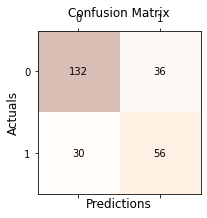

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
# roc_auc_score(y_test, y_pred)

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.8103543743078627


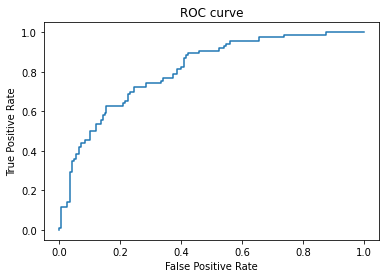

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

In [ ]:
shap_values = explainer(X_train)

In [ ]:
print(X_test.iloc[-2])
print(y_test.iloc[-2])

Pregnancies                   8.000
Glucose                     143.000
BloodPressure                66.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          34.900
DiabetesPedigreeFunction      0.129
Age                          41.000
Name: 586, dtype: float64
1


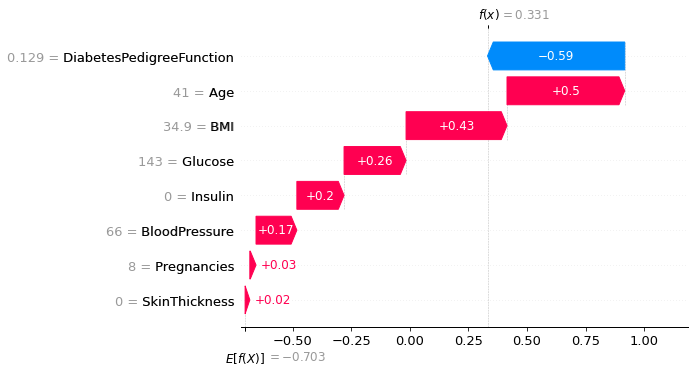

In [ ]:
shap_values_single = explainer(X_test)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values_single[-2])

In [ ]:
# visualize the first prediction's explanation with a force plot
shap.initjs()

shap.plots.force(shap_values_single[-2])

In [ ]:
print(X_test.iloc[0])
print(y_test.iloc[0])

Pregnancies                   6.00
Glucose                      98.00
BloodPressure                58.00
SkinThickness                33.00
Insulin                     190.00
BMI                          34.00
DiabetesPedigreeFunction      0.43
Age                          43.00
Name: 668, dtype: float64
0


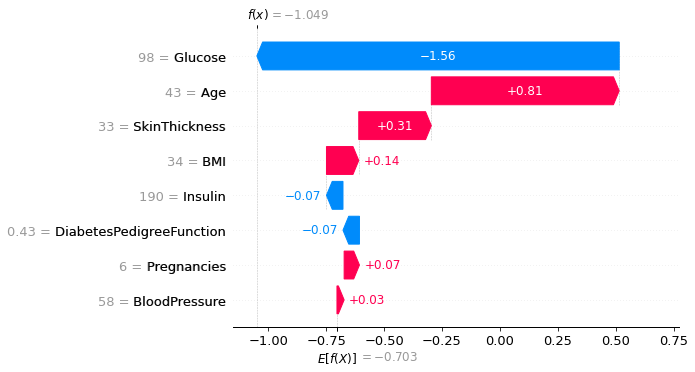

In [ ]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values_single[0])

In [ ]:
# visualize the first prediction's explanation with a force plot
shap.initjs()

shap.plots.force(shap_values_single[0])

he above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue. Another way to visualize the same explanation is to use a force plot (these are introduced in our Nature BME paper):

In [ ]:
# visualize the first prediction's explanation with a force plot
shap.initjs()

shap.plots.force(shap_values[0])

If we take many force plot explanations such as the one shown above, rotate them 90 degrees, and then stack them horizontally, we can see explanations for an entire dataset (in the notebook this plot is interactive):

In [ ]:
# visualize all the training set predictions
shap.initjs()

shap.plots.force(shap_values)

To understand how a single feature effects the output of the model we can plot the SHAP value of that feature vs. the value of the feature for all the examples in a dataset. Since SHAP values represent a feature's responsibility for a change in the model output, the plot below represents the change in predicted house price as RM (the average number of rooms per house in an area) changes. Vertical dispersion at a single value of RM represents interaction effects with other features. To help reveal these interactions we can color by another feature. If we pass the whole explanation tensor to the color argument the scatter plot will pick the best feature to color by. In this case it picks RAD (index of accessibility to radial highways) since that highlights that the average number of rooms per house has less impact on home price for areas with a high RAD value.

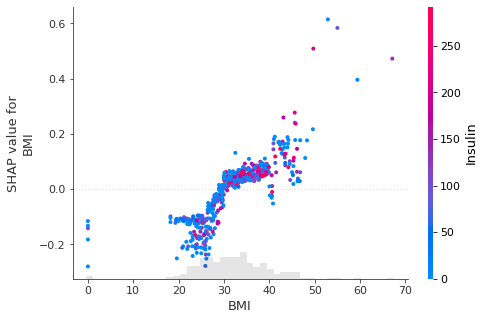

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"BMI"], color=shap_values[:,"Insulin"])

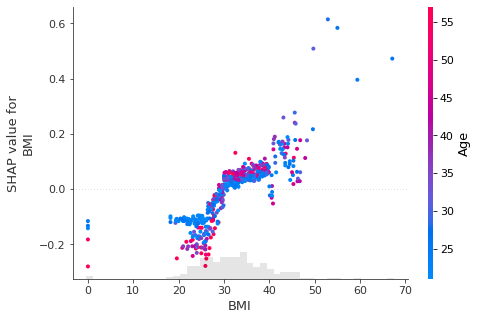

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"BMI"], color=shap_values)

To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample. The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low). This reveals for example that a high LSTAT (% lower status of the population) lowers the predicted home price.

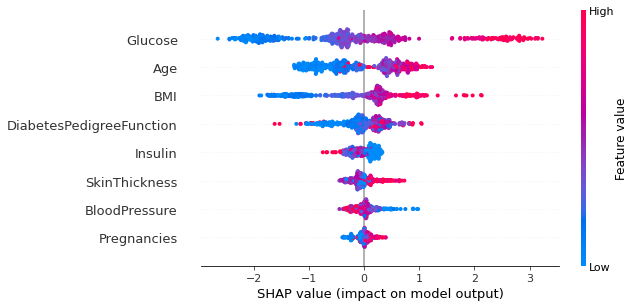

In [ ]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

We can also just take the mean absolute value of the SHAP values for each feature to get a standard bar plot (produces stacked bars for multi-class outputs):

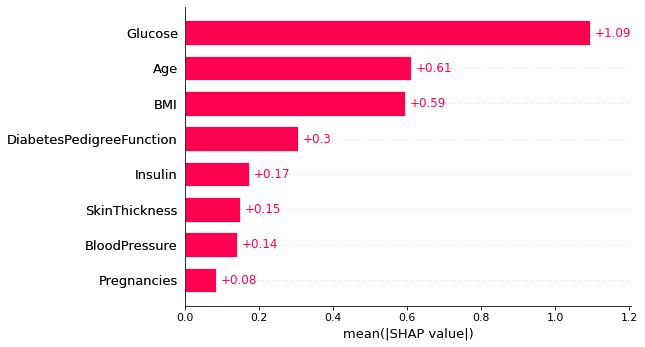

In [ ]:
shap.plots.bar(shap_values)
